In [153]:
# select for a cosmic muon enriched region and choose the optimal chi2reduced selection for cosmic muon veto

import ROOT as rt
import csv
import re
import sys
import collections

from collections import OrderedDict
import uproot
import pandas as pd
from root_numpy import array2tree


import scipy
import awkward
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/lib/')
sys.path.append('/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
from helper_functions import deltaR, deltaPhi
import numpy as np
from scipy.stats import norm
import math
import CMS_lumi, tdrstyle
a= tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 0


print(sys.version)

3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


# Load ntuples

In [154]:
fpath =OrderedDict()
tree = OrderedDict()


start_t = time.time()
data_year = 'full'

v1 = 'V1p17'


v2 = '/v5/v135'
v2 = '/v5/v140'
# v2 = '/v5/v137'


v2 = '/v5/v164'


if data_year == 2016:
    data_path = '/storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+v1+'/Data2016/'+v2+'/normalized/'
    fpath['data'] = data_path + 'Run2_displacedJetMuonNtupler_'+v1+'_Data2016_Run2016-HighMET-07Aug17_goodLumi.root'
elif data_year == 2017:
    data_path = '/storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+v1+'/Data2017/'+v2+'/normalized/'
    fpath['data'] = data_path + 'Run2_displacedJetMuonNtupler_'+v1+'_Data2017_Run2017-HighMET-17Nov2017_goodLumi.root'
elif data_year == 2018:
    data_path = '/storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+v1+'/Data2018/'+v2+'/normalized/'
    fpath['data'] = data_path + 'Run2_displacedJetMuonNtupler_'+v1+'_Data2018_17Sept2018_Run2018-HighMET-17Sep2018_goodLumi.root'
else: #2016, 2017, 2018AB
    data_path = '/storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+v1+'/Data2018/'+v2+'/normalized/'
    fpath['data'] = data_path + 'Run2_displacedJetMuonNtupler_'+v1+'_Data2016_Data2017_Data2018-HighMET_goodLumi.root'


# decay = 'bbbb'
# mass = [  '15', '40','55']
# ctaus  = ['100', '1000','10000', '100000']
# for ct in ctaus:
#     for m in mass:
#         v2 = '/v1/v145'
#         mc_path = '/storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+v1+'/MC_all'+v2+'/normalized/'
#         fpath['m'+m+'ctau'+ct] = mc_path + 'ggH_HToSSTo'+decay+'_MH-125_MS-'+str(m)+'_ctau-'+ct+'_137000pb_weighted.root'
        
NEvents = {}
for k,v in fpath.items():
    print (k, v)
    root_dir = uproot.open(v) 

    tree[k] = root_dir['MuonSystem']
    NEvents[k] = root_dir['NEvents'][1]
    a = tree[k]["weight"].array()
    print("NEvents",NEvents[k])

data /storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/Data2018//v5/v164/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Data2017_Data2018-HighMET_goodLumi.root
NEvents 22763250.0


# load variables

In [160]:

JET_PT_CUT = 10.0
MUON_PT_CUT = 20.0
N_RECHIT_CUT = 90
jetPt_cut = 50
tightid = False
ring_cut = 50

cut_based = True
cut_based_version = 'v4'

intime = True
DPHI_CUT = 1


gLLP_csc = {}

nCscClusters = {}
selections_cluster = {}
sel_cluster = {}
met = {}
metPhi = {}

jetMet_dPhiMin = {}
dphiMet_cluster = {}
nRechits_sr = {}
jetMet_dPhiMin30_sr = {}
cscClusterTimeSpread = {}
bdt_score = {}
nCscChambers = {}
a = {}
b = {}
c = {}
d = {}
sel_ev = {}
cluster_index = ''
nRings = {}

cscRechitClusterMuonVetoPt = {}
cscRechitClusterJetVetoPt = {}

cscRechitClusterTime = {}
cscRechitClusterPhi = {}
cscRechitClusterEta = {}
cscClusterSize = {}
cscRechitClusterNStation = {}
cscRechitClusterMaxStation = {}
cscRechitClusterDPhiMet = {}
cscRechitClusterMe11Ratio = {}
cscRechitClusterMe12Ratio = {}
cscRechitClusterMe11 = {}
cscRechitClusterMe12 = {}
cscRechitClusterDphi = {}

deltaRCluster = {}
nDtSectors = {}
metPhi = {}
nCscClusters = {}
nDtClusters = {}
evtNum = {}
runNum = {}
lumiNum = {}
dtRechitClusterDphi = {}
nDtWheels25 = {}
nDTRechitsNoiseSec7 = {}
nDTRechitsNoiseSec8 = {}
nDTRechitsNoiseSec9 = {}
nDTRechitsNoiseSec10 = {}
nDtStations25 = {}

cosmicTwoLegCluster1NStation = {}
cosmicTwoLegCluster2NStation = {}

cosmicTwoLegClusterChi2Reduced = {}


dtRechitClusterDPhiMet = {}
dtRechitClusterNSegmentStation1 = {}
dtRechitClusterNSegmentStation2 = {}
dtRechitClusterNSegmentStation3 = {}
dtRechitClusterNSegmentStation4 = {}
dtRechitClusterNSegStation1 = {}
dtRechitClusterNSegStation2 = {}
dtRechitClusterNSegStation3 = {}
dtRechitClusterNSegStation4 = {}

dtRechitClusterNOppositeSegStation1 = {}
dtRechitClusterNOppositeSegStation2 = {}
dtRechitClusterNOppositeSegStation3 = {}
dtRechitClusterNOppositeSegStation4 = {}

dtRechitClusterMuonVetoPt = {}
dtRechitClusterJetVetoPt = {}
dtRechitClusterPhi = {}
dtRechitClusterEta = {}
dtClusterSize = {}
dtRechitClusterTime = {}
dtRechitClusterNStation = {}
dtRechitClusterDPhiMet = {}
dtRechitClusterMaxStation = {}
dtRechitClusterMaxStationRatio = {}
dtRechitClusterDphi = {}
dtRechitClusterMaxDPhi ={}
nCosmic = {}
cosmicTwoLegClusterChi2Reduced = {}
cosmicTwoLegCluster2NStation = {}
cosmicTwoLegCluster1NStation = {}
cosmicTwoLegCluster2Index = {}
cosmicTwoLegCluster1Index = {}
dtSegNStation = {}
nMe11 = {}
nDtRings = {}
nCscRings = {}
dtSegPhi = {}
dtRechitCluster_match_RPChits_dPhi0p5={}

category =2

#2csc, 2dt, 1csc+1dt
for k, T in tree.items():
        
########### SELECTION: CLUSTERS ############
      
    sel_csccluster = np.logical_and(T.array('cscRechitCluster' + cluster_index + 'TimeWeighted') < 12.5, \
                                                                         T.array('cscRechitCluster' + cluster_index + 'TimeWeighted') > -5)
    sel_csccluster = np.logical_and(sel_csccluster, T.array('cscRechitCluster' + cluster_index + 'TimeSpreadWeightedAll')<20)
    sel_csccluster = np.logical_and(sel_csccluster, np.abs(T.array('cscRechitCluster' + cluster_index + 'MetEENoise_dPhi'))<1.2)
    sel_csccluster = np.logical_and(sel_csccluster, T.array('cscRechitCluster' + cluster_index + 'JetVetoPt')<30)
    sel_csccluster = np.logical_and(sel_csccluster, T.array('cscRechitCluster' + cluster_index + 'Me11Ratio')<1.2)
    sel_csccluster = np.logical_and(sel_csccluster, np.logical_not(np.logical_and(T.array('cscRechitClusterMuonVetoPt') >= 30, T.array('cscRechitClusterMuonVetoGlobal'))))


    sel_dtcluster = np.abs(T.array('dtRechitClusterJetVetoPt')) < 50
    sel_dtcluster = np.logical_and(sel_dtcluster, np.logical_not(np.logical_and(T.array('dtRechitClusterMaxStation')==1, T.array('dtRechitClusterMaxStationRatio')>=0.9)))
#     if k == 'data': sel_dtcluster = np.logical_and(sel_dtcluster, np.abs(T.array('dtRechitClusterMetEENoise_dPhi')) >= 1)
    sel_dtcluster = np.logical_and(sel_dtcluster, np.abs(T.array('dtRechitClusterMetEENoise_dPhi')) < 1)        
    sel_dtcluster = np.logical_and(sel_dtcluster, np.logical_not(np.logical_and(T.array('dtRechitClusterMuonVetoPt') >= 10, T.array('dtRechitClusterMuonVetoLooseId'))))
    
    
    cut = 5
    station = (T.array('dtRechitClusterNSegmentStation1')>cut).astype(int)+(T.array('dtRechitClusterNSegmentStation2')>cut).astype(int)\
+(T.array('dtRechitClusterNSegmentStation3')>cut).astype(int)+(T.array('dtRechitClusterNSegmentStation4')>cut).astype(int)

    max_station = np.maximum(np.maximum(np.maximum(T.array('dtRechitClusterNSegmentStation1'), T.array('dtRechitClusterNSegmentStation2')), T.array('dtRechitClusterNSegmentStation3')), T.array('dtRechitClusterNSegmentStation4'))
    min_station = np.minimum(np.minimum(np.minimum(T.array('dtRechitClusterNSegmentStation1'), T.array('dtRechitClusterNSegmentStation2')), T.array('dtRechitClusterNSegmentStation3')), T.array('dtRechitClusterNSegmentStation4'))

    sel_dtcluster = np.logical_and(sel_dtcluster, np.logical_or(station<4, min_station/max_station<0.4)) #remove if both clusters are 4 stations
#     if addNoiseFlag and not 'data' in k: 
#         sel_dtcluster = np.logical_and(sel_dtcluster, (T.array('dtRechitClusterSize')+T.array('dtRechitClusterNoiseHit')) >= 50)
#     else: sel_dtcluster = np.logical_and(sel_dtcluster, T.array('dtRechitClusterSize') >= 50)

        
        

########### SELECTION: JETS ############
    
    sel_jet = np.logical_and(T.array('jetPt') > 30, np.abs(T.array('jetEta')) < 2.4 )
    sel_jet = np.logical_and(sel_jet, np.logical_not(T.array('jetTightPassId')))

########### SELECTION: COSMIC MUONS ############
#     sel_cosmic = T.array('cosmicTwoLegCluster1NStation')+ T.array('cosmicTwoLegCluster2NStation')>=4
#     sel_cosmic = np.logical_and(sel_cosmic, T.array('cosmicTwoLegClusterChi2Reduced')<2500)
#     sel_cosmic = np.logical_and(sel_cosmic, T.array('cosmicTwoLegCluster1NStation')>=2)
#     sel_cosmic = np.logical_and(sel_cosmic, T.array('cosmicTwoLegCluster1NStation')>=2)
    
            
########### SELECTION: SPIKE IN DT ############
    
    spike = np.logical_and( T.array('nDTRechitsSector')[:,0,0,7]>50,  T.array('nDTRechitsSector')[:,0,0,7]+T.array('nDTRechitsSector')[:,0,0,8]+T.array('nDTRechitsSector')[:,0,0,9]>120)
    spike = np.logical_and(spike, T.array('nDTRechitsSector')[:,0,0,8]>25)
    spike = np.logical_and(spike, T.array('nDTRechitsSector')[:,0,0,9]>10)

########### SELECTION: EVENTS ############
    hlt = T['HLTDecision'].array()
    # select only triggered events
    sel_ev[k] = T.array('METNoMuTrigger')


    sel_ev[k] = np.logical_and(sel_ev[k], (T.array('nDtRings')+T.array('nCscRings'))<10)
    sel_ev[k] = np.logical_and(sel_ev[k] ,T.array('metEENoise') > 200)
    sel_ev[k] = np.logical_and(sel_ev[k] , sel_jet.sum()>=1)
    sel_ev[k] = np.logical_and(sel_ev[k],T.array('Flag2_all'))
    sel_ev[k] = np.logical_and(sel_ev[k],np.logical_not(spike))

    if category == 0:
        sel_ev[k]  = np.logical_and(sel_ev[k],sel_csccluster.sum() == 2)
        sel_ev[k]  = np.logical_and(sel_ev[k],sel_dtcluster.sum() == 0)
    elif category == 1:
        sel_ev[k]  = np.logical_and(sel_ev[k],sel_dtcluster.sum() == 2)
        sel_ev[k]  = np.logical_and(sel_ev[k],sel_csccluster.sum() == 0)
    else:
        sel_ev[k]  = np.logical_and(sel_ev[k],sel_csccluster.sum() == 1)
        sel_ev[k]  = np.logical_and(sel_ev[k],sel_dtcluster.sum() == 1)

    
########### BRANCHES ############

    
   
    if category == 0:
#         cluster1 = T.array('evtNum')[sel_ev[k]]%2
#         cluster1 = np.column_stack((cluster1,np.logical_not(cluster1)))
#         cluster1 = np.argwhere(cluster1)[:,1]
#         cluster2 = 1-cluster1
        cscRechitClusterMuonVetoPt[k] = T.array('cscRechitCluster' + cluster_index + 'MuonVetoPt')[sel_csccluster][sel_ev[k]]
        cscRechitClusterJetVetoPt[k] = T.array('cscRechitCluster' + cluster_index + 'JetVetoPt')[sel_csccluster][sel_ev[k]]
        cscRechitClusterPhi[k] = T.array('cscRechitCluster' + cluster_index + 'Phi')[sel_csccluster][sel_ev[k]]
        cscRechitClusterEta[k] = T.array('cscRechitCluster' + cluster_index + 'Eta')[sel_csccluster][sel_ev[k]]
        cscClusterSize[k] =  T.array('cscRechitCluster' + cluster_index + 'Size')[sel_csccluster][sel_ev[k]]
        cscRechitClusterTime[k] =  T.array('cscRechitCluster' + cluster_index + 'TimeTotal')[sel_csccluster][sel_ev[k]]
        cscRechitClusterNStation[k] =  T.array('cscRechitCluster' + cluster_index + 'NStation10')[sel_csccluster][sel_ev[k]]  
        cscRechitClusterMe11Ratio[k] =  T.array('cscRechitCluster' + cluster_index + 'Me11Ratio')[sel_csccluster][sel_ev[k]]  
        cscRechitClusterMe12Ratio[k] =  T.array('cscRechitCluster' + cluster_index + 'Me12Ratio')[sel_csccluster][sel_ev[k]]  

        
        cscRechitClusterMe11[k] = (T.array('cscRechitCluster' + cluster_index + 'NRechitChamberPlus11') + T.array('cscRechitCluster' + cluster_index + 'NRechitChamberMinus11'))[sel_csccluster][sel_ev[k]]  

        nCscClusters[k] = sel_csccluster.sum()[sel_ev[k]]
        cscRechitClusterDphi[k] =  deltaPhi(T.array('cscRechitClusterPhi')[sel_csccluster][sel_ev[k]][:,0], T.array('cscRechitClusterPhi')[sel_csccluster][sel_ev[k]][:,1])

    elif category == 1:

        dtRechitClusterDphi[k] =  deltaPhi(T.array('dtRechitClusterPhi')[sel_dtcluster][sel_ev[k]][:,0], T.array('dtRechitClusterPhi')[sel_dtcluster][sel_ev[k]][:,1])

        dtRechitClusterNSegmentStation1[k]=  T.array('dtRechitClusterNSegmentStation1')[sel_dtcluster][sel_ev[k]]
        dtRechitClusterNSegmentStation2[k]=  T.array('dtRechitClusterNSegmentStation2')[sel_dtcluster][sel_ev[k]]
        dtRechitClusterNSegmentStation3[k]=  T.array('dtRechitClusterNSegmentStation3')[sel_dtcluster][sel_ev[k]]
        dtRechitClusterNSegmentStation4[k]=  T.array('dtRechitClusterNSegmentStation4')[sel_dtcluster][sel_ev[k]]
        dtRechitClusterNOppositeSegStation1[k]=  T.array('dtRechitClusterNOppositeSegStation1')[sel_dtcluster][sel_ev[k]]
        dtRechitClusterNOppositeSegStation2[k]=  T.array('dtRechitClusterNOppositeSegStation2')[sel_dtcluster][sel_ev[k]]
        dtRechitClusterNOppositeSegStation3[k]=  T.array('dtRechitClusterNOppositeSegStation3')[sel_dtcluster][sel_ev[k]]
        dtRechitClusterNOppositeSegStation4[k]=  T.array('dtRechitClusterNOppositeSegStation4')[sel_dtcluster][sel_ev[k]]
        dtRechitClusterNSegStation1[k]=  T.array('dtRechitClusterNSegStation1')[sel_dtcluster][sel_ev[k]]
        dtRechitClusterNSegStation2[k]=  T.array('dtRechitClusterNSegStation2')[sel_dtcluster][sel_ev[k]]
        dtRechitClusterNSegStation3[k]=  T.array('dtRechitClusterNSegStation3')[sel_dtcluster][sel_ev[k]]
        dtRechitClusterNSegStation4[k]=  T.array('dtRechitClusterNSegStation4')[sel_dtcluster][sel_ev[k]]
        dtRechitClusterMuonVetoPt[k] = T.array('dtRechitClusterMuonVetoPt')[sel_dtcluster][sel_ev[k]]
        dtRechitClusterJetVetoPt[k] = T.array('dtRechitClusterJetVetoPt')[sel_dtcluster][sel_ev[k]]
        dtRechitClusterPhi[k] = T.array('dtRechitClusterPhi')[sel_dtcluster][sel_ev[k]]
        dtRechitClusterEta[k] = T.array('dtRechitClusterEta')[sel_dtcluster][sel_ev[k]]
        dtClusterSize[k] =  T.array('dtRechitClusterSize')[sel_dtcluster][sel_ev[k]]
        dtRechitClusterTime[k] =  T.array('dtRechitCluster_match_RPCBx_dPhi0p5')[sel_dtcluster][sel_ev[k]]
        dtRechitClusterTime[k] =  T.array('dtRechitCluster_match_RPCBx_dPhi0p5')[sel_dtcluster][sel_ev[k]]
        dtRechitClusterNStation[k] =  T.array('dtRechitClusterNStation10')[sel_dtcluster][sel_ev[k]]
        dtRechitClusterDPhiMet[k] =  T.array('dtRechitClusterMetEENoise_dPhi')[sel_dtcluster][sel_ev[k]]
        dtRechitClusterMaxStation[k] =  T.array('dtRechitClusterMaxStation')[sel_dtcluster][sel_ev[k]]
        dtRechitClusterMaxStationRatio[k] =  T.array('dtRechitClusterMaxStationRatio')[sel_dtcluster][sel_ev[k]]

        dtRechitClusterDphi[k] =  deltaPhi(T.array('dtRechitClusterPhi')[sel_dtcluster][sel_ev[k]][:,0], T.array('dtRechitClusterPhi')[sel_dtcluster][sel_ev[k]][:,1])

        dtRechitClusterMaxDPhi[k] = T.array('dtRechitClusterMaxDPhi')[sel_dtcluster][sel_ev[k]]
        
        dtRechitCluster_match_RPChits_dPhi0p5[k] = T.array('dtRechitCluster_match_RPChits_dPhi0p5')[sel_dtcluster][sel_ev[k]]
        
        dtSegPhi[k] = T.array('dtSegPhi')[sel_ev[k]]
    else:
        dtRechitClusterNSegmentStation1[k]=  T.array('dtRechitClusterNSegmentStation1')[sel_dtcluster][sel_ev[k]][:,0]
        dtRechitClusterNSegmentStation2[k]=  T.array('dtRechitClusterNSegmentStation2')[sel_dtcluster][sel_ev[k]][:,0]
        dtRechitClusterNSegmentStation3[k]=  T.array('dtRechitClusterNSegmentStation3')[sel_dtcluster][sel_ev[k]][:,0]
        dtRechitClusterNSegmentStation4[k]=  T.array('dtRechitClusterNSegmentStation4')[sel_dtcluster][sel_ev[k]][:,0]
        dtRechitClusterNOppositeSegStation1[k]=  T.array('dtRechitClusterNOppositeSegStation1')[sel_dtcluster][sel_ev[k]][:,0]
        dtRechitClusterNOppositeSegStation2[k]=  T.array('dtRechitClusterNOppositeSegStation2')[sel_dtcluster][sel_ev[k]][:,0]
        dtRechitClusterNOppositeSegStation3[k]=  T.array('dtRechitClusterNOppositeSegStation3')[sel_dtcluster][sel_ev[k]][:,0]
        dtRechitClusterNOppositeSegStation4[k]=  T.array('dtRechitClusterNOppositeSegStation4')[sel_dtcluster][sel_ev[k]][:,0]
        dtRechitClusterMuonVetoPt[k] = T.array('dtRechitClusterMuonVetoPt')[sel_dtcluster][sel_ev[k]][:,0]
        dtRechitClusterJetVetoPt[k] = T.array('dtRechitClusterJetVetoPt')[sel_dtcluster][sel_ev[k]][:,0]
        dtRechitClusterPhi[k] = T.array('dtRechitClusterPhi')[sel_dtcluster][sel_ev[k]][:,0]
        dtRechitClusterEta[k] = T.array('dtRechitClusterEta')[sel_dtcluster][sel_ev[k]][:,0]
        dtClusterSize[k] =  T.array('dtRechitClusterSize')[sel_dtcluster][sel_ev[k]][:,0]
        dtRechitClusterTime[k] =  T.array('dtRechitCluster_match_RPCBx_dPhi0p5')[sel_dtcluster][sel_ev[k]][:,0]
        dtRechitClusterNStation[k] =  T.array('dtRechitClusterNStation10')[sel_dtcluster][sel_ev[k]][:,0]
        dtRechitClusterMaxStation[k] =  T.array('dtRechitClusterMaxStation')[sel_dtcluster][sel_ev[k]][:,0]
        dtRechitClusterMaxStationRatio[k] =  T.array('dtRechitClusterMaxStationRatio')[sel_dtcluster][sel_ev[k]][:,0]
        dtRechitCluster_match_RPChits_dPhi0p5[k] = T.array('dtRechitCluster_match_RPChits_dPhi0p5')[sel_dtcluster][sel_ev[k]][:,0]

        cscRechitClusterMuonVetoPt[k] = T.array('cscRechitCluster' + cluster_index + 'MuonVetoPt')[sel_csccluster][sel_ev[k]][:,0]
        cscRechitClusterJetVetoPt[k] = T.array('cscRechitCluster' + cluster_index + 'JetVetoPt')[sel_csccluster][sel_ev[k]][:,0]
        cscRechitClusterPhi[k] = T.array('cscRechitCluster' + cluster_index + 'Phi')[sel_csccluster][sel_ev[k]][:,0]
        cscRechitClusterEta[k] = T.array('cscRechitCluster' + cluster_index + 'Eta')[sel_csccluster][sel_ev[k]][:,0]
        cscClusterSize[k] =  T.array('cscRechitCluster' + cluster_index + 'Size')[sel_csccluster][sel_ev[k]][:,0]
        cscRechitClusterTime[k] =  T.array('cscRechitCluster' + cluster_index + 'TimeTotal')[sel_csccluster][sel_ev[k]][:,0]
        cscRechitClusterNStation[k] =  T.array('cscRechitCluster' + cluster_index + 'NStation10')[sel_csccluster][sel_ev[k]][:,0]
        cscRechitClusterMaxStation[k] =  T.array('cscRechitCluster' + cluster_index + 'MaxStation')[sel_csccluster][sel_ev[k]][:,0]

        cscRechitClusterMe11Ratio[k] =  T.array('cscRechitCluster' + cluster_index + 'Me11Ratio')[sel_csccluster][sel_ev[k]][:,0]
        cscRechitClusterMe12Ratio[k] =  T.array('cscRechitCluster' + cluster_index + 'Me12Ratio')[sel_csccluster][sel_ev[k]][:,0] 
        cscRechitClusterMe11[k] = (T.array('cscRechitCluster' + cluster_index + 'NRechitChamberPlus11') + T.array('cscRechitCluster' + cluster_index + 'NRechitChamberMinus11'))[sel_csccluster][sel_ev[k]][:,0] 
        cscRechitClusterMe12[k] = (T.array('cscRechitCluster' + cluster_index + 'NRechitChamberPlus12') + T.array('cscRechitCluster' + cluster_index + 'NRechitChamberMinus12'))[sel_csccluster][sel_ev[k]][:,0] 

        
        deltaRCluster[k] = deltaR(dtRechitClusterEta[k], dtRechitClusterPhi[k],cscRechitClusterEta[k], cscRechitClusterPhi[k])
        
        
        cscRechitClusterDPhiMet[k] = np.abs(T.array('cscRechitCluster' + cluster_index + 'MetEENoise_dPhi'))[sel_csccluster][sel_ev[k]][:,0]
        dtRechitClusterDPhiMet[k] = np.abs(T.array('dtRechitClusterMetEENoise_dPhi'))[sel_dtcluster][sel_ev[k]][:,0]
        
        
    nDtRings[k] = T.array('nDtRings')[sel_ev[k]]
    nCscRings[k] = T.array('nCscRings')[sel_ev[k]]
        
#     cosmicTwoLegCluster1NStation[k] = T.array('cosmicTwoLegCluster1NStation')[sel_ev[k]]
#     cosmicTwoLegCluster2NStation[k] = T.array('cosmicTwoLegCluster2NStation')[sel_ev[k]]

#     cosmicTwoLegClusterChi2Reduced[k] = T.array('cosmicTwoLegClusterChi2Reduced')[sel_ev[k]]
    metPhi[k] = T.array('metPhiEENoise')[sel_ev[k]]

#     dtSegR = ((T.array('dtSegX')**2+T.array('dtSegY')**2)**0.5)[sel_ev[k]]
#     dtSegNStation[k] = np.zeros((np.count_nonzero(sel_ev[k])))
#     dtSegNStation[k] = ((dtSegR<500).sum()>1).astype(int)
#     dtSegNStation[k] += ((np.logical_and(dtSegR>=500, dtSegR<600)).sum()>1).astype(int)
#     dtSegNStation[k] += ((np.logical_and(dtSegR>=600, dtSegR<700)).sum()>1).astype(int)
#     dtSegNStation[k] += ((dtSegR>=700).sum()>1).astype(int)

    

    evtNum[k] = T.array('evtNum')[sel_ev[k]]
    runNum[k] = T.array('runNum')[sel_ev[k]]
    lumiNum[k] = T.array('lumiSec')[sel_ev[k]]

In [156]:
T.array('dtRechitCluster_match_RPChits_dPhi0p5')[sel_dtcluster][sel_ev[k]]

<JaggedArray [[5]] at 0x7f75ee590be0>

In [172]:
cscRechitClusterJetVetoPt[k]

array([0.], dtype=float32)

# plot number of hits

In [158]:
c  = rt.TCanvas()
for k in runNum.keys():
#     if not k == 'data':continue
    seg_cut = 0
    rechit_cut = 0
    nstation = (dtRechitClusterNSegmentStation1[k]>1).astype(int)+(dtRechitClusterNSegmentStation2[k]>1).astype(int)\
    +(dtRechitClusterNSegmentStation3[k]>1).astype(int)+(dtRechitClusterNSegmentStation4[k]>1).astype(int)
    nstationseg = (dtRechitClusterNSegStation1[k]>seg_cut).astype(int)+(dtRechitClusterNSegStation2[k]>seg_cut).astype(int)\
    +(dtRechitClusterNSegStation3[k]>seg_cut).astype(int)+(dtRechitClusterNSegStation4[k]>seg_cut).astype(int)
    cond= np.abs(dtRechitClusterDphi[k])<2
    print(np.count_nonzero(cond), len(cond))
    tmp= np.abs(dtRechitClusterDphi[k])<2
#     cond = np.logical_and(cond, dtRechitClusterMaxDPhi[k][:,0]<2)
#     cond = np.logical_and(cond, dtRechitClusterMaxDPhi[k][:,1]<2)
    sel_muon1 = np.logical_and(dtRechitClusterNOppositeSegStation1[k][:,0]>0, dtRechitClusterNOppositeSegStation2[k][:,0]>0)
    sel_muon1 = np.logical_and(sel_muon1, dtRechitClusterNOppositeSegStation3[k][:,0]>0)
    sel_muon1 = np.logical_and(sel_muon1, dtRechitClusterNOppositeSegStation4[k][:,0]>0)
#     sel_muon1 = np.logical_and(sel_muon1, dtRechitClusterNOppositeSegStation1[k][:,0]+dtRechitClusterNOppositeSegStation2[k][:,0]\
#                            +dtRechitClusterNOppositeSegStation3[k][:,0]+dtRechitClusterNOppositeSegStation4[k][:,0]>=6)
    sel_muon2 = np.logical_and(dtRechitClusterNOppositeSegStation1[k][:,1]>0, dtRechitClusterNOppositeSegStation2[k][:,1]>0)
    sel_muon2 = np.logical_and(sel_muon2, dtRechitClusterNOppositeSegStation3[k][:,1]>0)
    sel_muon2 = np.logical_and(sel_muon2, dtRechitClusterNOppositeSegStation4[k][:,1]>0)
#     sel_muon2 = np.logical_and(sel_muon2, dtRechitClusterNOppositeSegStation1[k][:,1]+dtRechitClusterNOppositeSegStation2[k][:,1]\
#                            +dtRechitClusterNOppositeSegStation3[k][:,1]+dtRechitClusterNOppositeSegStation4[k][:,1]>=6)
    cond = np.logical_and(cond, np.logical_not(np.logical_and(nstation[:,0]>=3, sel_muon1)))
    cond = np.logical_and(cond,  np.logical_not(np.logical_and(nstation[:,1]>=3, sel_muon2)))

    print((dtRechitClusterNOppositeSegStation1[k]+dtRechitClusterNOppositeSegStation2[k]\
                           +dtRechitClusterNOppositeSegStation3[k]+dtRechitClusterNOppositeSegStation4[k]).flatten())
#     plt.hist( (dtRechitClusterNOppositeSegStation1[k][:,1]+dtRechitClusterNOppositeSegStation2[k][:,1]\
#                            +dtRechitClusterNOppositeSegStation3[k][:,1]+dtRechitClusterNOppositeSegStation4[k][:,1]), bins = 50, range = (0,50),density=1,histtype='step')
    h = create_TH1D(
                    
                    bins = 50, range = (0,50),density=1,histtype='step')

    
c.Draw()


KeyError: 'data'

[ True  True  True  True  True] [ True  True  True  True  True]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/cosmic_muon/ndtsegments_dphigt2.png has been created
Info in <TCanvas::SaveSource>: C++ Macro file: /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/cosmic_muon/ndtsegments_dphigt2.C has been generated
Info in <TCanvas::Print>: pdf file /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/cosmic_muon/ndtsegments_dphigt2.pdf has been created


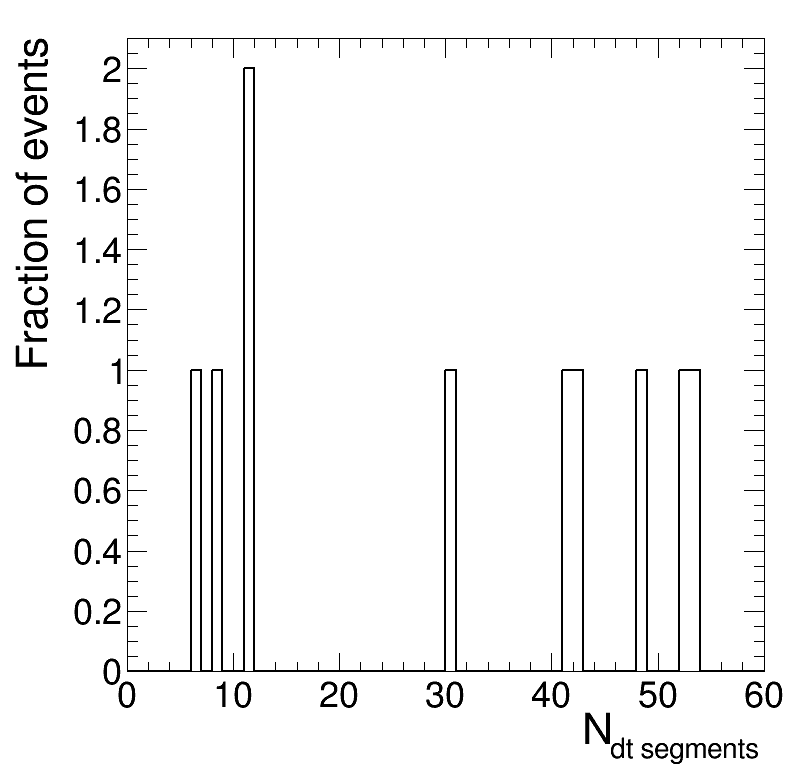

In [75]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.6,0.7,0.80,0.92)


leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
h = {}

sel_muon2 = np.logical_and(dtRechitClusterNOppositeSegStation1[k][:,1]>0, dtRechitClusterNOppositeSegStation2[k][:,1]>0)
sel_muon2 = np.logical_and(sel_muon2, dtRechitClusterNOppositeSegStation3[k][:,1]>0)
sel_muon2 = np.logical_and(sel_muon2, dtRechitClusterNOppositeSegStation4[k][:,1]>0)

sel_muon1 = np.logical_and(dtRechitClusterNOppositeSegStation1[k][:,0]>0, dtRechitClusterNOppositeSegStation2[k][:,0]>0)
sel_muon1 = np.logical_and(sel_muon1, dtRechitClusterNOppositeSegStation3[k][:,0]>0)
sel_muon1 = np.logical_and(sel_muon1, dtRechitClusterNOppositeSegStation4[k][:,0]>0)
print(sel_muon1, sel_muon2)


h[k] = create_TH1D((dtRechitClusterNOppositeSegStation1[k]+dtRechitClusterNOppositeSegStation2[k]\
                           +dtRechitClusterNOppositeSegStation3[k]+dtRechitClusterNOppositeSegStation4[k]).flatten(),\
                   axis_title = ['N_{dt segments}', 'Fraction of events'], binning = [60,0,60])

h[k].Draw('')
leg.Draw()
c.SetRightMargin(0.04)
plot_path = '/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/cosmic_muon/'
c.Draw()
c.SaveAs(plot_path + 'ndtsegments_dphigt2.png')
c.SaveAs(plot_path + 'ndtsegments_dphigt2.C')
c.SaveAs(plot_path + 'ndtsegments_dphigt2.pdf')

In [147]:
evtNum[k]

array([171280648,  67076232, 408846841,  68479309, 463937698],
      dtype=uint32)

# plot dPhi of segment and cluster

[[2.6018643 -2.984148] [-2.9928336 1.9893378] [0.8238364 -1.0778214] [1.1020359 1.8430666] [-2.628633 2.6952457]]
[[3 2] [3 1] [3 4] [3 2] [2 2]]
[[92 81] [120 92] [125 121] [97 67] [134 67]]
[-0.6971731  1.301014   1.9016578 -0.7410307  0.9593067]
[171280648  67076232 408846841  68479309 463937698]
67076232


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/cosmic_muon/dPhi_seg_cluster_evt67076232_dphiCluster1p3.png has been created
Info in <TCanvas::Print>: pdf file /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/cosmic_muon/dPhi_seg_cluster_evt67076232_dphiCluster1p3.pdf has been created
Info in <TCanvas::SaveSource>: C++ Macro file: /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/cosmic_muon/dPhi_seg_cluster_evt67076232_dphiCluster1p3.C has been generated


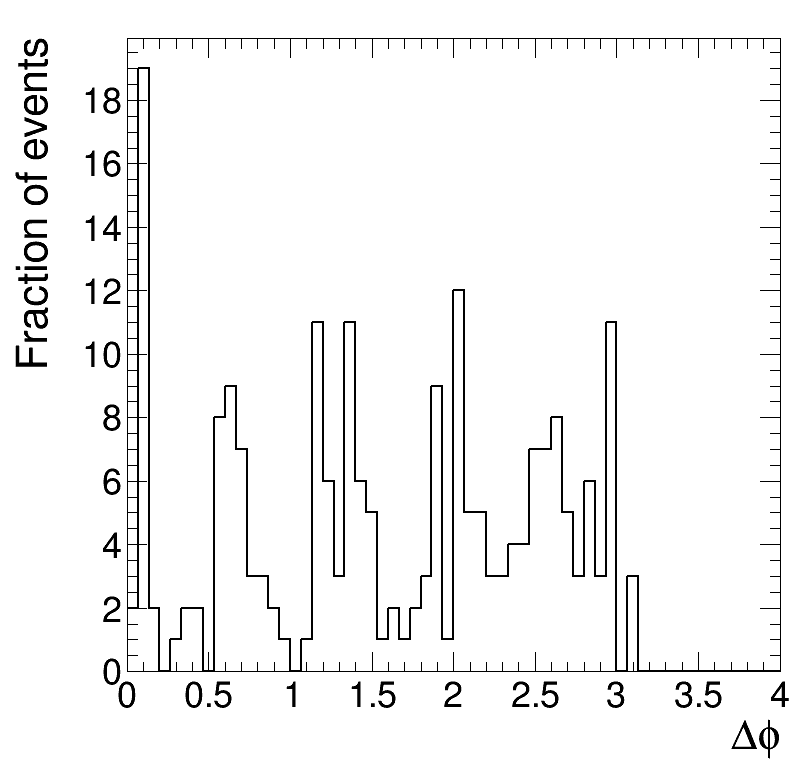

In [152]:

dphi = deltaPhi(dtRechitClusterPhi[k][:,0],dtRechitClusterPhi[k][:,1])
print(dtRechitClusterPhi[k])
print(dtRechitClusterNStation[k])
print(dtClusterSize[k])
print(dphi)
print(evtNum[k])
for i in range(len(dtRechitClusterPhi[k])):
    if not i == 1:continue
    c = rt.TCanvas('c','c', 800, 800)

    h = {}
    deltaPhiSeg0 = []
    deltaPhiSeg1 = []
    deltaPhiSeg0 += list(deltaPhi(dtSegPhi[k][i], dtRechitClusterPhi[k][i,0]))

    deltaPhiSeg1 += list(deltaPhi(dtSegPhi[k][i], dtRechitClusterPhi[k][i,1]))

    print(evtNum[k][i])
    
    deltaPhiSeg0 = np.abs(np.array(deltaPhiSeg0))
    deltaPhiSeg1 = np.abs(np.array(deltaPhiSeg1))
    # cond = np.logical_and(deltaPhiSeg0>0.4,deltaPhiSeg1>0.4)
    cond = np.logical_and(deltaPhiSeg0>=0.0,deltaPhiSeg1>=0.0)


    h[k] = create_TH1D(np.abs(list(deltaPhiSeg0[cond])+list(deltaPhiSeg1[cond])),axis_title = ['#Delta#phi', 'Fraction of events'], binning = [60,0,4])
    # h[k] = create_TH1D((dtRechitClusterNOppositeSegStation1[k]).flatten(),\
    #                    axis_title = ['N_{dt segments}', 'Fraction of events'], binning = [60,0,60])

    h[k].Draw('')
    # leg.Draw()
    # c.SetRightMargin(0.04)
    c.Draw()
    plot_path = '/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/cosmic_muon/'
    c.SaveAs(plot_path + 'dPhi_seg_cluster_evt'+str(evtNum[k][i])+'_dphiCluster'+str(round(abs(dphi[i]),2)).replace('.','p')+'.png')

    c.SaveAs(plot_path + 'dPhi_seg_cluster_evt'+str(evtNum[k][i])+'_dphiCluster'+str(round(abs(dphi[i]),2)).replace('.','p')+'.pdf')

    c.SaveAs(plot_path + 'dPhi_seg_cluster_evt'+str(evtNum[k][i])+'_dphiCluster'+str(round(abs(dphi[i]),2)).replace('.','p')+'.C')


In [261]:
# print evtNum for event display
k = 'data'
cond= np.abs(dtRechitClusterDphi[k])<2
cond = np.logical_and(cond, evtNum[k] == 228964571)
nstation = (dtRechitClusterNSegmentStation1[k]>1).astype(int)+(dtRechitClusterNSegmentStation2[k]>1).astype(int)\
    +(dtRechitClusterNSegmentStation3[k]>1).astype(int)+(dtRechitClusterNSegmentStation4[k]>1).astype(int)
for i in range(len(evtNum[k][cond])):
#     print(str(runNum[k][i])+':'+str(lumiNum[k][i])+':'+str(evtNum[k][i]), nstation[i])
#     print(str(runNum[k][i])+':'+str(lumiNum[k][i])+':'+str(evtNum[k][i]))
    print(evtNum[k][cond][i], nstation[cond][i], dtRechitClusterNStation[k][cond][i], dtRechitClusterMaxStationRatio[k][cond][i], dtClusterSize[k][cond][i], dtRechitClusterMaxDPhi[k][cond][i],\
         dtRechitClusterNOppositeSegStation1[k][cond][i], dtRechitClusterNOppositeSegStation2[k][cond][i], dtRechitClusterNOppositeSegStation3[k][cond][i], dtRechitClusterNOppositeSegStation4[k][cond][i])
    

228964571 [4 4] [2 3] [0.8405797 0.5125   ] [207  80] [0.316239 0.316239] [0 2] [0 1] [1 1] [1 4]


In [ ]:
171280648 [4 2] [3 2] [0.6086956  0.56790125] [92 81] [2.590912  1.8937392] [3 4] [4 3] [20  2] [3 2]
67076232 [4 1] [3 1] [0.7583333  0.98913044] [120  92] [2.7384048 2.2934895] [16  8] [7 7] [4 3] [21 23]
408846841 [4 4] [3 4] [0.48       0.38842976] [125 121] [2.5581636 1.9016578] [2 1] [22  1] [7 3] [11  6]
68479309 [4 3] [3 2] [0.52577317 0.76119405] [97 67] [2.7001202 2.8420343] [1 1] [1 3] [3 3] [1 1]
476483009 [3 4] [3 4] [0.85795456 0.37209302] [176 129] [2.8683367 2.801993 ] [33 33] [9 9] [10  8] [6 6]
463937698 [4 2] [2 2] [0.52238804 0.6865672 ] [134  67] [2.7655973 2.5582814] [4 5] [36 36] [10 10] [2 2]

In [215]:
CSC-CSC inverted dPhi:
    320804:650:983620368
CSC-DT inverted dPhi:
    302388:350:413723949
321988:86:89523852

SyntaxError: invalid syntax (<ipython-input-215-c29779244560>, line 1)

# plots

data 30.0
m7ctau1000 26.0
m15ctau1000 47.0
m40ctau1000 41.0
m55ctau1000 4.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


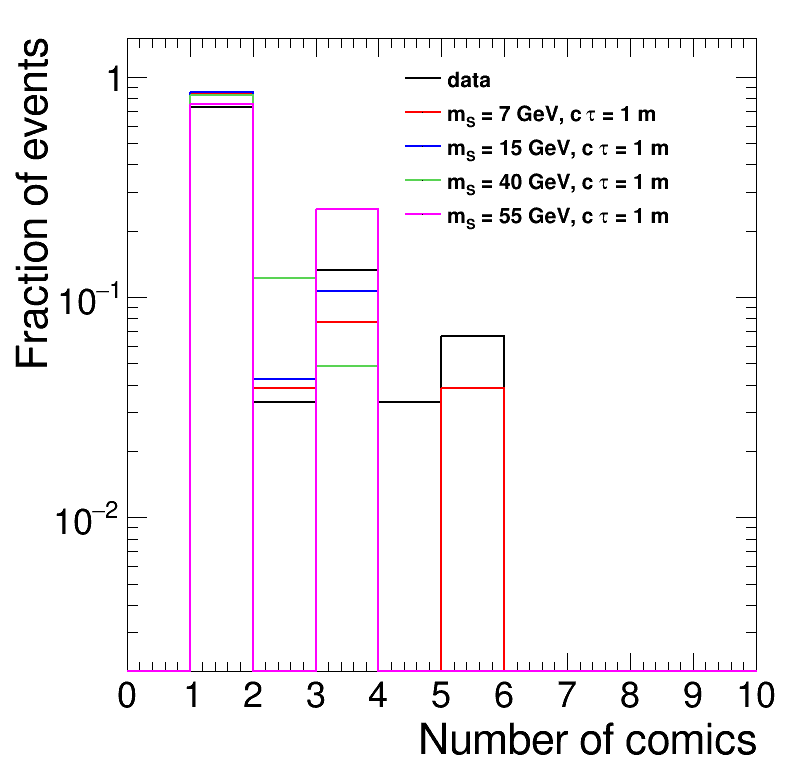

In [104]:
assert(category == 1)


var = [cosmicTwoLegCluster1NStation, cosmicTwoLegCluster2NStation, cosmicTwoLegClusterChi2Reduced]
name = ['cosmicTwoLegCluster1NStation', 'cosmicTwoLegCluster2NStation', 'cosmicTwoLegClusterChi2Reduced']

xaxis = ['cosmicTwoLegCluster1NStation', 'cosmicTwoLegCluster2NStation', '#chi^{2} [m^{2}]']



bins = [ [20,0,1]]*4


for index in range(len(var)):
    if not index == 2:continue
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.5,0.7,0.75,0.92)
    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    h = {}

    for i, k in enumerate(var[index].keys()):
#         if not k == 'data':continue
        cond = dtSegNStation[k] == 4
        sel_cosmic = np.logical_and(cosmicTwoLegCluster2NStation[k]>=2,cosmicTwoLegCluster1NStation[k]>=2)
#         sel_cosmic = np.logical_and(sel_cosmic, cosmicTwoLegClusterChi2Reduced[k]<2500)
        cond = np.logical_and(cond, sel_cosmic.sum()>=1)

#         h[k] = create_TH1D(np.abs(var[index][k][cond]).min()/10000, axis_title = [xaxis[index], 'Fraction of events'], binning = bins[index])

#         h[k] = create_TH1D(var[index][k][cond].max()/10000, axis_title = [xaxis[index], 'Fraction of events'], binning = bins[index])
#         h[k] = create_TH1D(sel_cosmic.sum()[cond], axis_title = ['Number of comics', 'Fraction of events'], binning = [10,0,10])


#         print(k, np.count_nonzero(var[index][k][cond].max()<0.15)/np.count_nonzero(cond))
        if k == 'data':leg.AddEntry(h[k],k)
        else: leg.AddEntry(h[k],'m_{S} = ' + k[k.find('m')+1:k.find('ctau')] + ' GeV, c#tau = 1 m')

        print(k,h[k].Integral())


        h[k].SetLineColor(std_color_list[i])
        if h[k].Integral()>0:h[k].Scale(1./h[k].Integral())


        if index == 4:h[k].SetMaximum(5)
        else: h[k].SetMaximum(1.5)
        h[k].SetMinimum(0.002)
        h[k].Draw('hist same')
    leg.Draw()
    c.SetRightMargin(0.05)


    # if setlog: 
    c.SetLogy()
    c.Draw()
    plot_path = '/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/selection_plots'
#     c.SaveAs(plot_path+v2+'/'+name[index]+".png")
#     c.SaveAs(plot_path+v2+'/'+name[index]+".pdf")
#     c.SaveAs(plot_path+v2+'/'+name[index]+".C")






In [60]:
var[index][k][cond].max()

array([5.87972510e+03, 3.81996680e+03, 1.52017090e+03, 1.45161836e+04,
       1.32595283e+04,           -inf, 1.74131943e+02, 3.51116028e+02,
       2.40681046e+02, 9.13655664e+03, 4.68797577e+02, 7.22154053e+02,
       9.88765076e+02, 2.88525781e+04, 1.98423499e+03,           -inf,
       1.17404180e+04, 6.43932471e+03, 7.60830469e+03, 1.75385681e+02,
       1.01940889e+04, 4.84755371e+03, 5.28886377e+03, 6.25209595e+02,
       4.37599316e+03, 4.37619843e+02, 4.01679736e+03, 2.21901367e+02,
       1.09848230e+03, 8.03158750e+04, 2.73346826e+03, 3.07036499e+03,
       9.18064514e+02,           -inf, 6.61548779e+03, 9.26797852e+02,
       4.42592871e+03, 5.29763367e+02, 1.04253883e+01,           -inf,
       1.62128967e+03,           -inf, 3.13895813e+02, 3.07739105e+02,
       9.45043262e+03, 2.38224121e+03, 1.07671234e+05, 3.44390820e+03,
       5.12728455e+02, 2.46400122e+03, 6.95778359e+04, 1.74298376e+03,
       2.55152393e+03, 2.05362036e+03, 3.17409393e+02, 1.07151147e+03,
      